In [1]:
from keras.datasets import imdb

In [2]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=200)
# num_words=200, 어휘 사전에 200개의 단어 사용

In [3]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
print(len(train_input[0]))  #첫번쨰 리뷰의 길이 218개의 토큰으로 이뤄져있음
print(len(train_input[1]))
print(len(train_input[2]))
print(len(train_input[3])) # ... 리뷰마다 길이가 다름

218
189
141
550


In [5]:
print(train_input[0]) #내가 가져온 keras 리뷰 데이터는 이미 정수로 변환되어있음

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_input, val_input, train_target, val_target = train_test_split (
    train_input, train_target, test_size = 0.2, random_state = 42)

In [9]:
print(train_target.dtype)
print(train_input.dtype)

int64
object


In [10]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [11]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


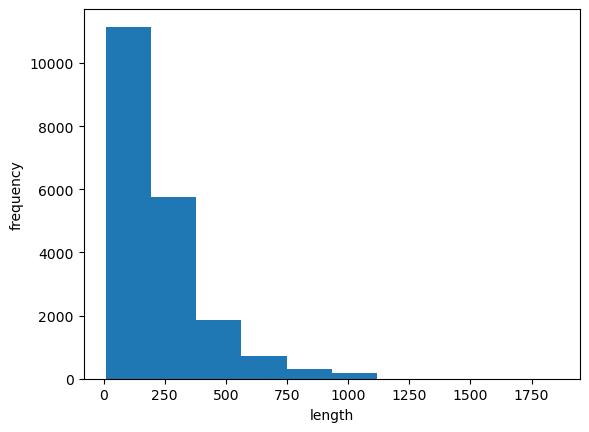

In [12]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel("length")
plt.ylabel("frequency")
plt.show()

In [13]:
from keras.preprocessing.sequence import pad_sequences

In [14]:
train_seq = pad_sequences(train_input, maxlen=100)
#순차 데이터(Sequential Data)의 길이를 100으로 통일, 빈 자리는 0으로 입력
#0은 패딩(<->풀링), 1은 문장의 시작, 2는 어휘사전에 없는 토큰

In [15]:
print(train_seq.shape)

(20000, 100)


In [16]:
print(train_seq[0]) #패딩된 데이터라 시작이 1이 아님

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [17]:
print(train_seq[0][-10:])

[  6   2  46   7  14  20  10  10   2 158]


In [18]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


In [19]:
val_seq = pad_sequences(val_input, maxlen = 100)

In [20]:
import keras

model = keras.Sequential()
model.add(keras.layers.Input(shape = (100, 200)))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [21]:
train_seq[0] 
#첫번째 토큰인 10을 원핫인코딩으로 바꾸면 000000000010000... 0
#원핫인코딩 > 정숫값을 배열에서 해당 정수 위치의 원소만 1이고 나머지는 모두 0으로 변환
#원핫인코딩 : 범주형 데이터(Categorical Data)를 머신러닝이나 딥러닝 모델이 이해하고 처리할 수 있는 숫자 형태의 벡터(Vector)로 변환하는 가장 일반적인 방법
#해당 데이터가 범주형인 이유는 어휘 사전(Vocabulary)에 있는 고유한 단어들의 집합으로 분해되어 순서나 크기의 의미 없이 명목형 독립적인 범주를 나타내기 때문

array([ 10,   4,  20,   9,   2,   2,   2,   5,  45,   6,   2,   2,  33,
         2,   8,   2, 142,   2,   5,   2,  17,  73,  17,   2,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12,   2,  69,   2, 142,  73,
         2,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
         2,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10,   2, 158])

In [22]:
train_oh = keras.utils.to_categorical(train_seq)
#train_seq를 원핫인코딩 변환하여 새로운 배열 생성

In [23]:
print(train_oh.dtype)

float64


In [24]:
print(train_oh.shape)
#1차원 정수배열 (100,) 에서 2차원인 (100, 200)이 됨

(20000, 100, 200)


In [25]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [26]:
print(np.sum(train_oh[0][0]))   #한개만 0인거 확인됨

1.0


In [27]:
val_oh = keras.utils.to_categorical(val_seq)

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_oh, train_target, epochs =100, batch_size = 64,
                    validation_data = (val_oh, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5096 - loss: 0.6969 - val_accuracy: 0.5504 - val_loss: 0.6866
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6105 - loss: 0.6603 - val_accuracy: 0.6700 - val_loss: 0.6203
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6715 - loss: 0.6138 - val_accuracy: 0.6942 - val_loss: 0.5955
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6974 - loss: 0.5880 - val_accuracy: 0.7006 - val_loss: 0.5842
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7043 - loss: 0.5741 - val_accuracy: 0.6886 - val_loss: 0.5951
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7150 - loss: 0.5640 - val_accuracy: 0.7096 - val_loss: 0.5738
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7214 - loss: 0.5574 - val_accuracy: 0.7000 - val_loss: 0.5806
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7301 - loss: 0.5468 - val_acc

In [30]:
print(train_oh.dtype)
print(train_target.dtype)
print(val_oh.dtype)
print(val_target.dtype)

float64
int64
float64
int64


In [31]:
print(train_target)

[0 0 0 ... 0 0 1]


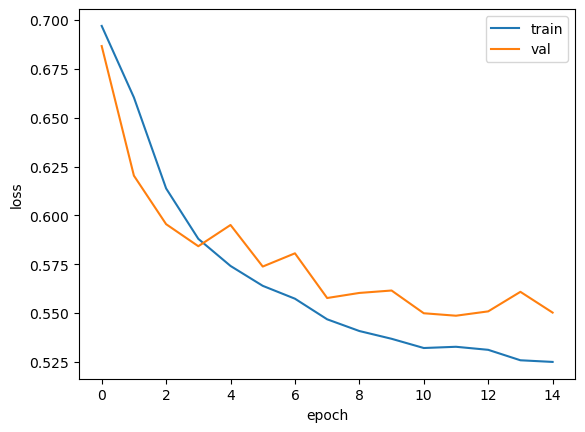

In [32]:
plt.plot(history.history['loss'], label ='train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [33]:
print(train_seq.nbytes, train_oh.nbytes)
#원핫인코딩을 하면 데이터 크기가 엄청 커짐
#약 7.6MB vs 3GB

8000000 3200000000


In [34]:
#원핫 인코딩 말고 단어임베딩 사용 > 각 단어를 고정된 크기의 실수 벡터로 바꾸는 것, 단어의 의미와 문맥적 관계(거리적,,) 보존하면서 저차원의 연속적 실수 벡터로 표현하는 기법

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)   #keras 내장 데이터셋 분리 
train_input, val_input, train_target, val_target = train_test_split(                       #가지고 있는 데이터셋 분리
    train_input, train_target, test_size = 0.2, random_state = 42)
train_seq = pad_sequences(train_input, maxlen =  100)
val_seq = pad_sequences(val_input, maxlen = 100)



In [35]:
print(train_input.shape)
print(train_target.shape)
print(train_seq.shape)

(20000,)
(20000,)
(20000, 100)


In [36]:
model_emb = keras.Sequential()    #모델 정의
model_emb.add(keras.layers.Input(shape=(100,)))   #입력층, 활성화 함수 없음
model_emb.add(keras.layers.Embedding(500, 16))    #임베딩층, 활성화 함수 없음, 입력 인덱스를 받아 해당 인덱스에 저장된 16차원 실수 벡터를 단순히 찾아서(Look up) 다음 층으로 전달
model_emb.add(keras.layers.SimpleRNN(8))          #순환신경망 레이어, 입력된 100개의 16차원 시퀀스를 순서대로 처리하여 문맥 정보를 압축한 최종 은닉 상태 출력, 기본값 하이퍼볼릭 탄젠트
model_emb.add(keras.layers.Dense(1, activation = 'sigmoid'))   #출력층

In [37]:
print(train_seq.shape)  #5000개 샘플, 100개의 토큰으로 이뤄짐

(20000, 100)


In [38]:
model_emb.summary()
# 임베딩 층은 (100,)크기를 입력받아서 (100, 16) 출력을만듦

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model_emb.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model_emb.fit(train_seq, train_target, epochs= 100, batch_size=64, 
                        validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5443 - loss: 0.6861 - val_accuracy: 0.5722 - val_loss: 0.6744
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6416 - loss: 0.6309 - val_accuracy: 0.6968 - val_loss: 0.5878
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7054 - loss: 0.5752 - val_accuracy: 0.6882 - val_loss: 0.5999
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7566 - loss: 0.5178 - val_accuracy: 0.7370 - val_loss: 0.5599
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7801 - loss: 0.4834 - val_accuracy: 0.7624 - val_loss: 0.5111
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7904 - loss: 0.4627 - val_accuracy: 0.7658 - val_loss: 0.5072
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7984 - loss: 0.4481 - val_accuracy: 0.7676 - val_loss: 0.4924
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8057 - loss: 0.4381 - val_ac

In [51]:
print(train_seq.shape)
print(train_target.shape)

(5000, 100)
(20000,)
